In [4]:
from helpers import *
import numpy as np
import pandas as pd
from implementations import *

In [ ]:
## Use pickle instead of csv, much faster, please comment out below 
data_path = '../data/dataset_to_release'
x_train_preclean, x_test_preclean, y_train, train_ids, test_ids = load_csv_data(data_path)

# Data cleaning

### Getting an idea of the data 
Find really bad columns and drop them

In [3]:
print("X train", x_train_preclean.shape)
print("X test", x_test_preclean.shape)

X train (328135, 321)
X test (109379, 321)


In [4]:
## Find how many values are completely empty in column
def percentageFilled(data):
    return 1 - np.isnan(data).sum() / len(data)

percentage_filled = np.apply_along_axis(percentageFilled, 0, x_train_preclean)


In [5]:
## Process data 
## 1. drop the columns with more than 80% missing values
def threshold_col_filter(data, threshold):
    """ 
    filter out data where the column has less than threshold percentage of data
    returns: 
        indicies of columns to keep
    """
    percentage_filled = np.apply_along_axis(percentageFilled, 0, data)
    # keep_indicies = np.argwhere(percentage_filled > threshold).flatten()
    return percentage_filled > threshold


def non_constant_filter(data):
    return np.logical_not(np.logical_or(np.isnan(np.nanstd(data, 0)), np.nanstd(data, 0) == 0))

# TODO uncorrelation?

# TODO correlation w

keep_indicies = np.argwhere(np.logical_and(
    threshold_col_filter(x_train_preclean, 0.2), 
    non_constant_filter(x_train_preclean)
    )
).flatten()

print("keep_indicies", keep_indicies)
print("len indices", len(keep_indicies))

keep_indicies [  0   1   2   3   4   5   6   7   8  10  13  15  16  17  20  21  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  42  43
  44  45  46  47  48  50  51  52  53  54  56  57  58  59  60  61  62  63
  65  66  67  68  69  70  71  72  73  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 118 136 198 199 216 217 218 219 220 221 222 223 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320]
len indices 201


### Data cleaning 

1. remove columns where 80% of the values are missing
2. replace the missing values of X with the mean of the column
3. standardize the data
4. add column of 1 at the beginning  

# **Make sure you do the same for x_test**

In [27]:
def is_categorical_feature(xn, threshold=0.05):
    return len(set(xn)) / len(xn) < threshold

def standardize(x):
    """Standardize the original data set."""
    return np.nan_to_num((x - np.nanmean(x, axis=0)) / np.nanstd(x, axis=0))

def one_hot_encode(xn):
    pass
     # TODO

def percentageFilled(data):
    return 1 - np.isnan(data).sum() / len(data)

def threshold_col_filter(data, threshold):
    percentage_filled = np.apply_along_axis(percentageFilled, 0, data)
    # keep_indicies = np.argwhere(percentage_filled > threshold).flatten()
    return percentage_filled > threshold

def non_constant_filter(data):
    return np.logical_not(np.logical_or(np.isnan(np.nanstd(data, 0)), np.nanstd(data, 0) == 0))

def almost_constant_filter(data, threshold=0.01):
    std_devs = np.nanstd(data, axis=0)
    mask = std_devs > threshold
    return mask


keep_indicies = np.argwhere(np.logical_and(
    threshold_col_filter(x_train_preclean, 0.2),
    non_constant_filter(x_train_preclean),
    almost_constant_filter(x_train_preclean, 0.01)
    )
).flatten()
print("keep_indicies", keep_indicies)

def filter_columns_by_indicies(data, keep_indicies):
    """
    used to process test data
    only keep the columns that are in the indicies
    """
    return data[:, keep_indicies]



x_train = filter_columns_by_indicies(x_train_preclean, keep_indicies)
print("X train", x_train.shape)

x_test = filter_columns_by_indicies(x_test_preclean, keep_indicies)
print("X test", x_test.shape)


keep_indicies [  0   1   2   3   4   5   6   7   8  10  13  15  16  17  20  21  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  42  43
  44  45  46  47  48  50  51  52  53  54  56  57  58  59  60  61  62  63
  65  66  67  68  69  70  71  72  73  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 118 136 198 199 216 217 218 219 220 221 222 223 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320]
X train (328135, 201)
X test (109379, 201)


In [9]:
## 2. Replace the missing values with the mean of the column, add columns 
def standardize(x):
    """Standardize the original data set."""
    return np.nan_to_num((x - np.nanmean(x, axis=0)) / np.nanstd(x, axis=0))

def standardize_median(x):
    return np.nan_to_num(np.abs(x - np.nanmedian(x, axis=0)) / np.nanstd(x, axis=0))


def process_data(x):
    x = standardize(x)
    x = np.c_[np.ones(len(x)), x]  # add the column of ones
    return x

x_train_std = process_data(x_train)
x_test_std = process_data(x_test)
print('x_test_std', x_test_std.shape)
print('x_train_std', x_train_std.shape)

x_test_std (109379, 202)
x_train_std (328135, 202)


In [21]:
subset_idx =[7, 8, 62, 219, 220, 222, 226, 229, 252, 253, 264, 276, 277, 295, 296, 299, 300, 301, 302, 303, 304]

subset = x_train_preclean[:, subset_idx]
subset = standardize(subset)
subset

array([[2.53290043, 2.53290043, 0.28398752, ..., 0.34718589, 0.26522141,
        0.41168639],
       [0.19675462, 0.19675462, 0.24309477, ..., 0.        , 0.        ,
        0.        ],
       [0.10699903, 0.10699903, 4.20921724, ..., 0.34718589, 0.26522141,
        0.41168639],
       ...,
       [0.07267939, 0.07267939, 0.1885711 , ..., 0.34718589, 0.26522141,
        0.41168639],
       [0.18170048, 0.18170048, 0.22037657, ..., 0.28798285, 0.26522141,
        0.36772918],
       [0.97641325, 0.97641325, 0.26581296, ..., 0.34718589, 0.26522141,
        0.41168639]])

### Outliers for Numerical valued 

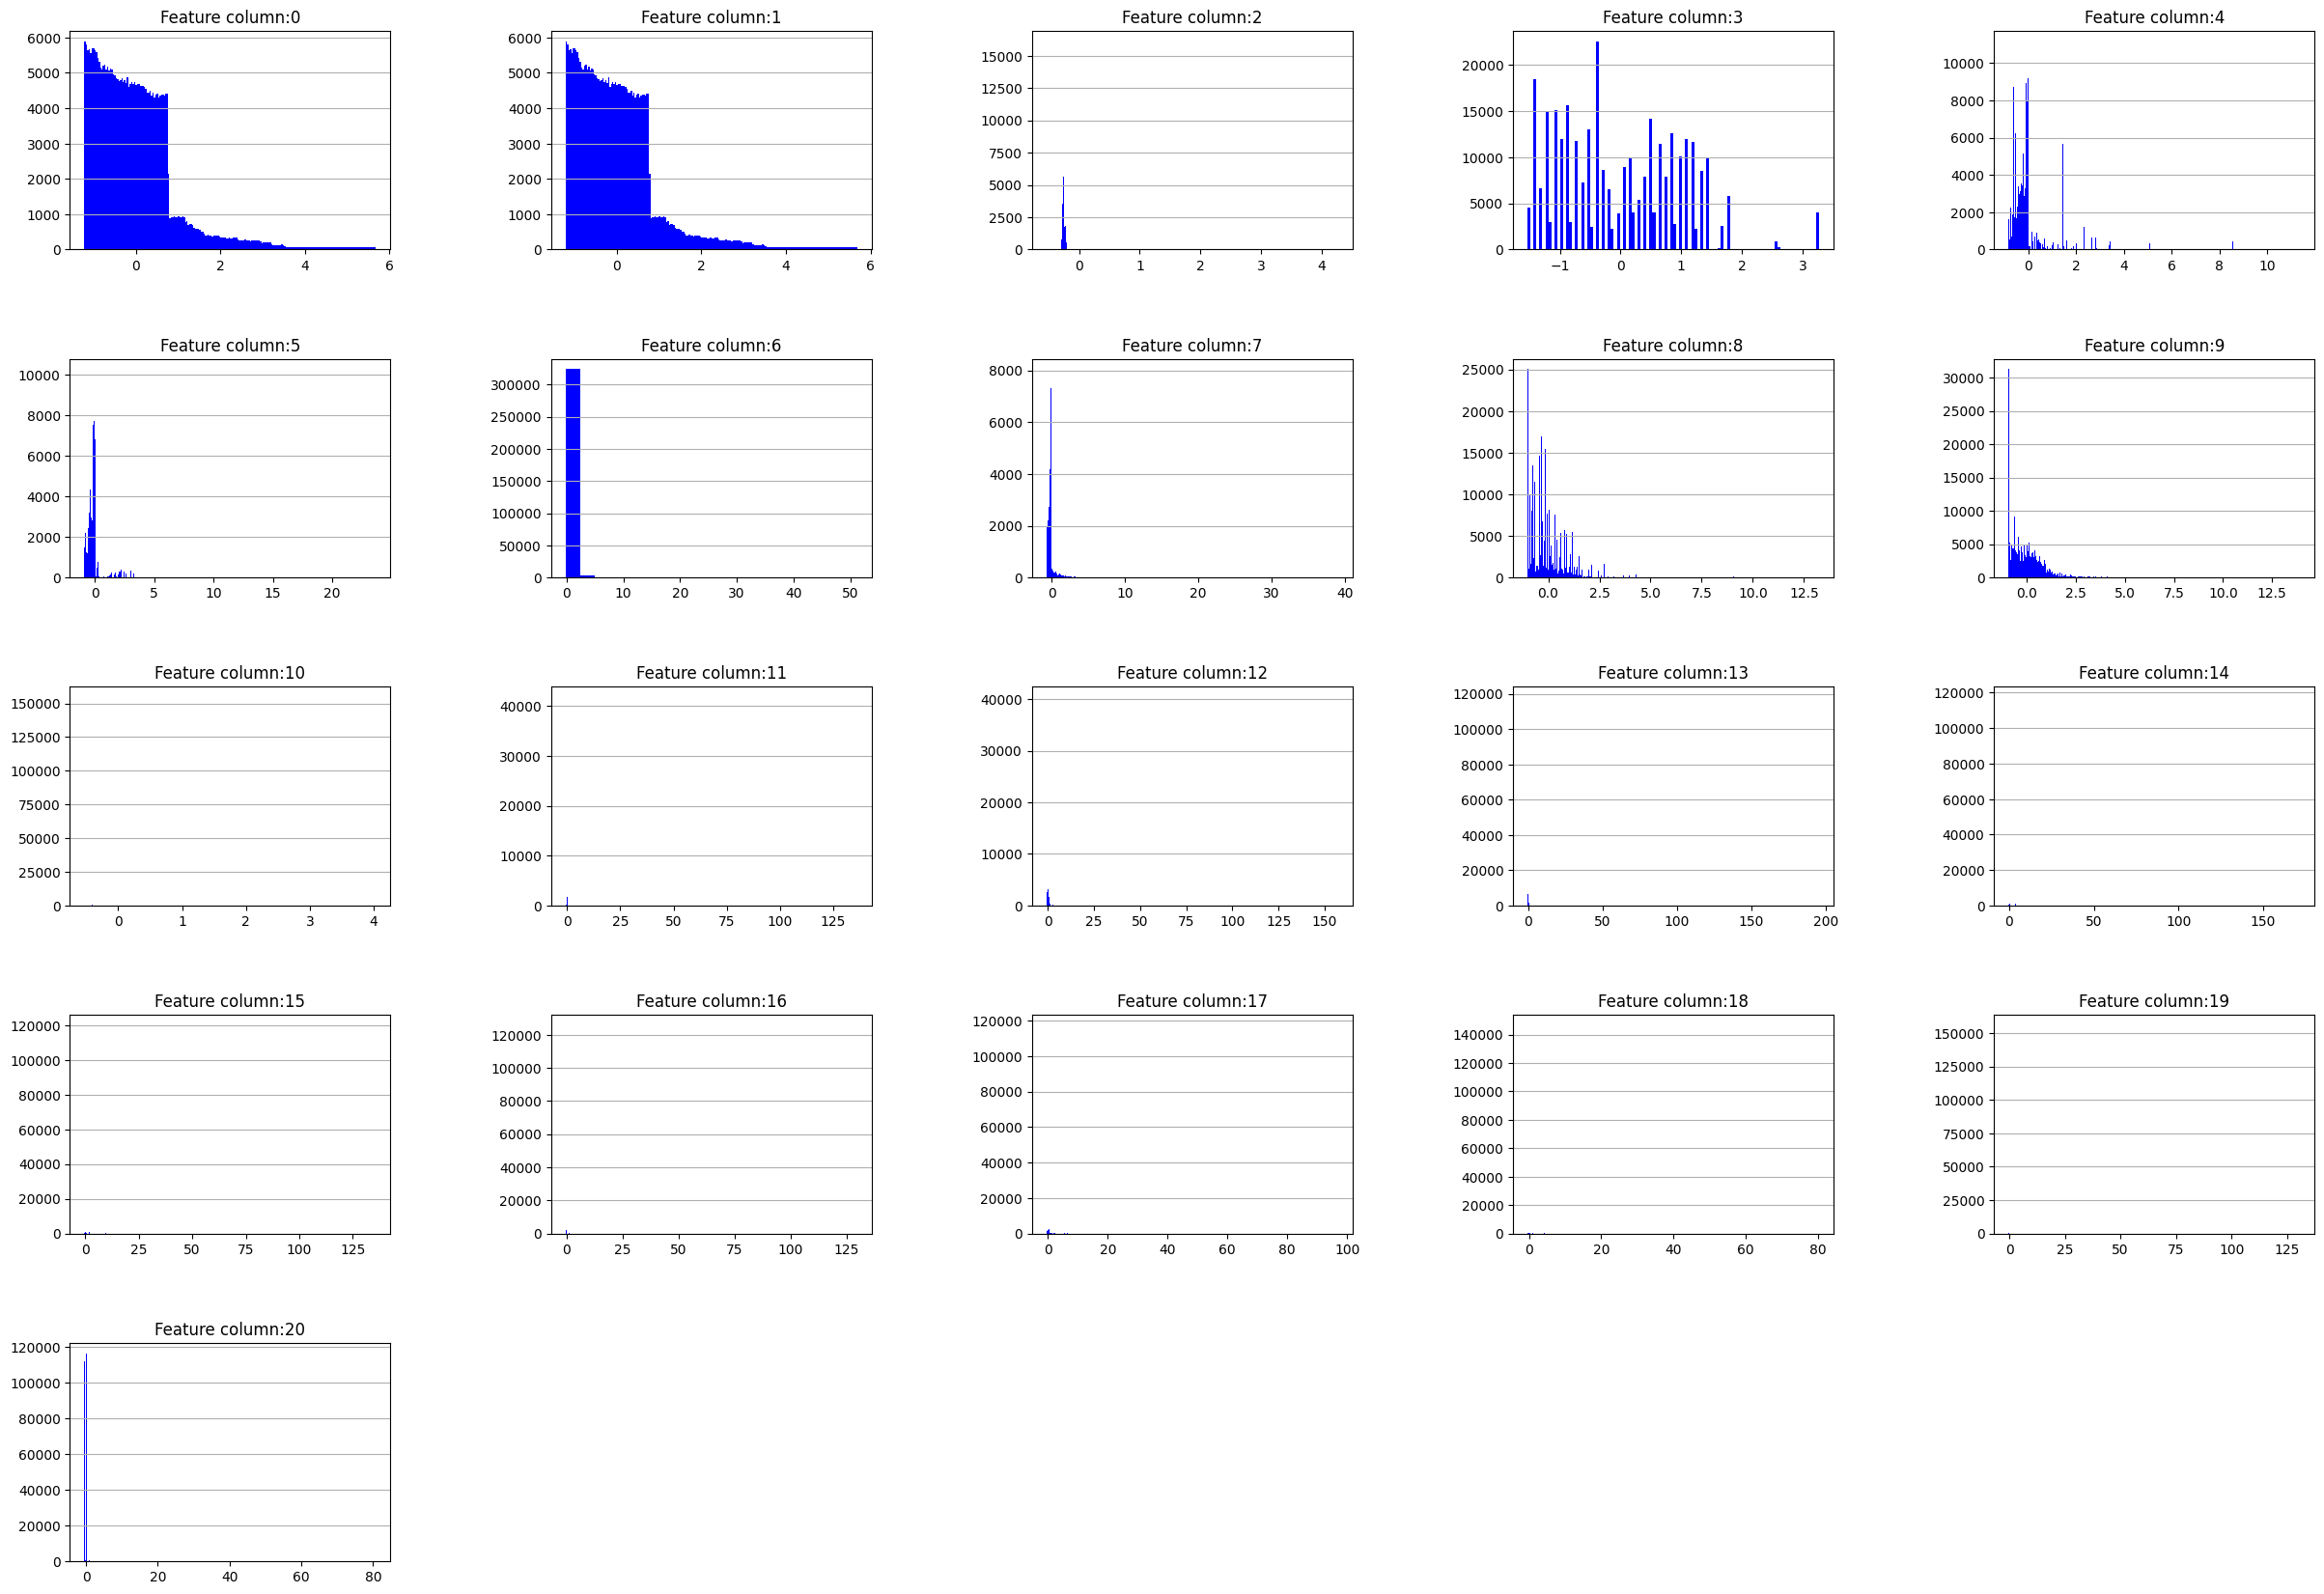

In [22]:
# find the indices of these columns in the data
import matplotlib.pyplot as plt
x = subset
x_std = np.nan_to_num((x - np.nanmean(x, axis=0)) / np.nanstd(x, axis=0))


def box_plot(x, feature_column):
    """ 
    Illustrating box-plot for a specific feature and printing indices of samples that can be outliers.
    """
    plt.boxplot(x[:, feature_column], showfliers=True)
    plt.title('feature column:' + str(feature_column))
    plt.show()
    index_to_delete = np.where(x[:, feature_column] == max(x[:, feature_column]))[0][0]
    print('sample (potential) outlier index:', index_to_delete)


def box_multi_plot(x):
    """
    Plotting the boxplots for all features
    """
    fig = plt.figure(figsize=(20, 15))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    for featureID in range(x.shape[1]):
        ax = fig.add_subplot(6, 5, featureID + 1)
        ax.boxplot(x[:, featureID], showfliers=True)
        ax.grid(axis='y', alpha=0.75)
        ax.set(title='Feature column:{}'.format(featureID))
def hist_multi_plot(x, color):
    """
    Plotting the histograms of each feature in a design matrix 'tx'.
    """
    fig = plt.figure(figsize=(30, 25))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    for featureID in range(x.shape[1]):
        ax = fig.add_subplot(6, 5, featureID + 1)
        ax.hist(x=x[:, featureID], bins='auto', color=color)
        ax.grid(axis='y', alpha=1)
        ax.set(title='Feature column:{}'.format(featureID))
    plt.show()

hist_multi_plot(x_std, color='blue')

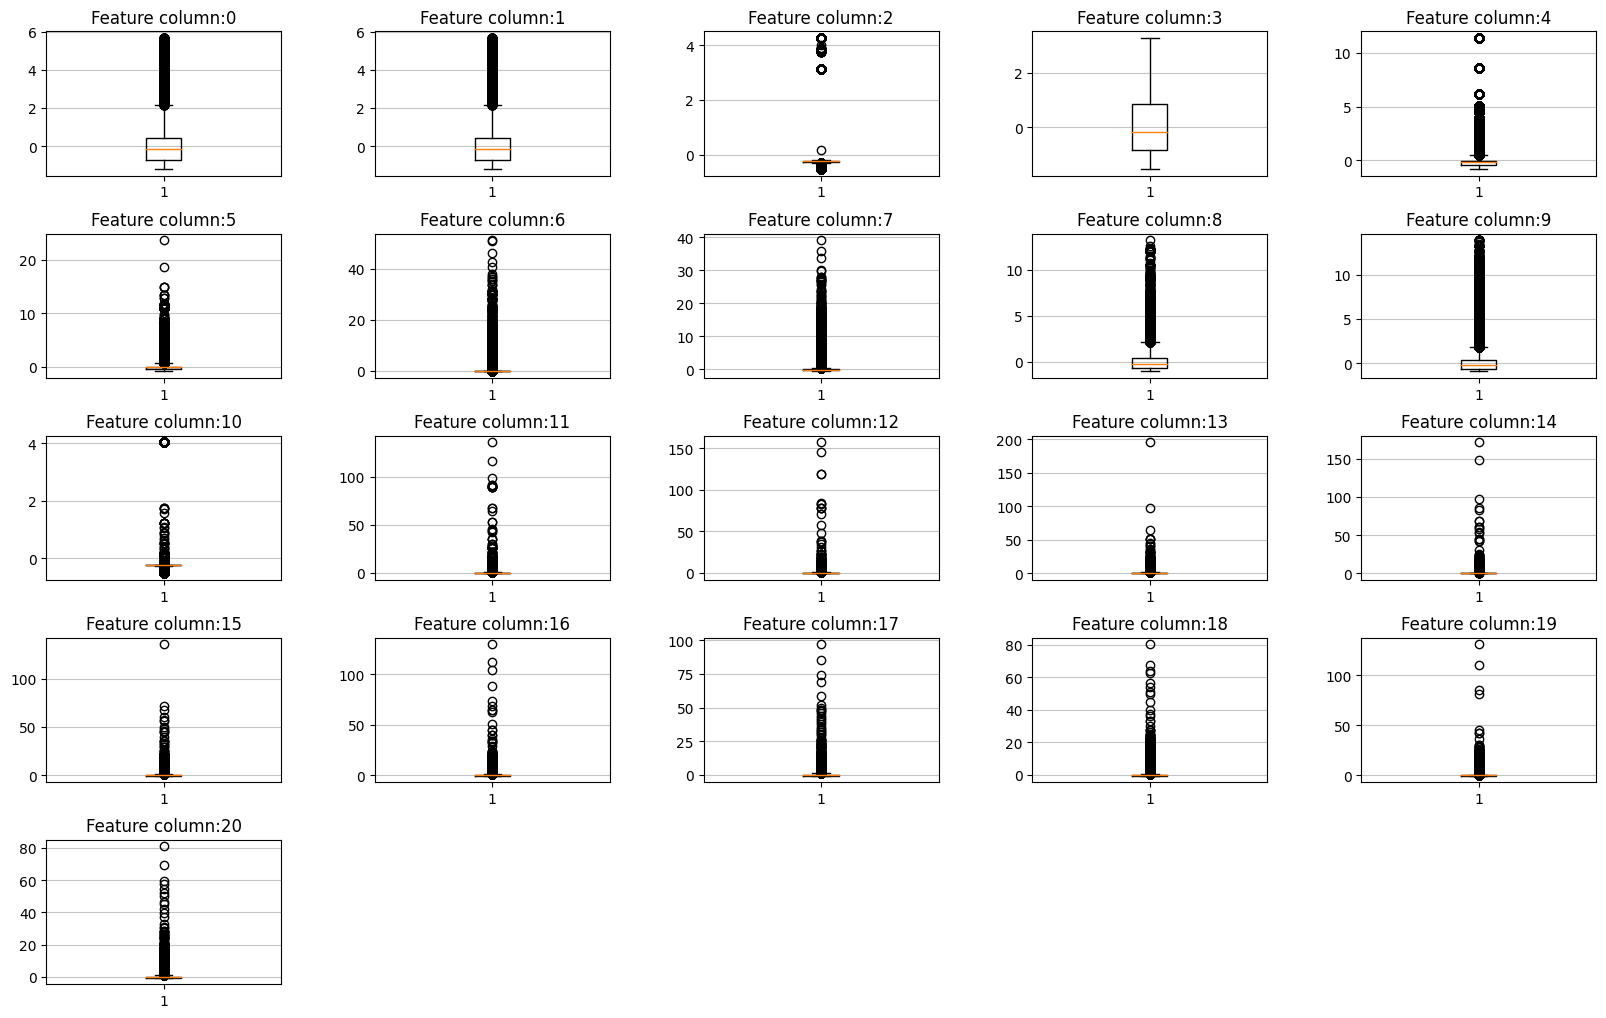

In [23]:
box_multi_plot(x_std)

In [2]:
# filter out the outliers
def remove_outliers(x_num, threshold = 3):
    
    x = x_num.copy()
    removed_count = 0
    for col in range(x.shape[1]):
        std = np.std(x[:, col])
        range_ = [-threshold*std, threshold*std]
        # Count outliers for this column
        removed_count_col = np.sum((x[:, col] < range_[0]) | (x[:, col] > range_[1]))
        removed_count += removed_count_col
        
        # Keep only values within the range
        x[np.logical_or(x[:, col] < range_[0], x[:, col] > range_[1])] = 0
        
    return x, removed_count


In [3]:
result, c = remove_outliers(x_std)
print(c / (x_std.shape[0] * x_std.shape[1]))
result

NameError: name 'x_std' is not defined

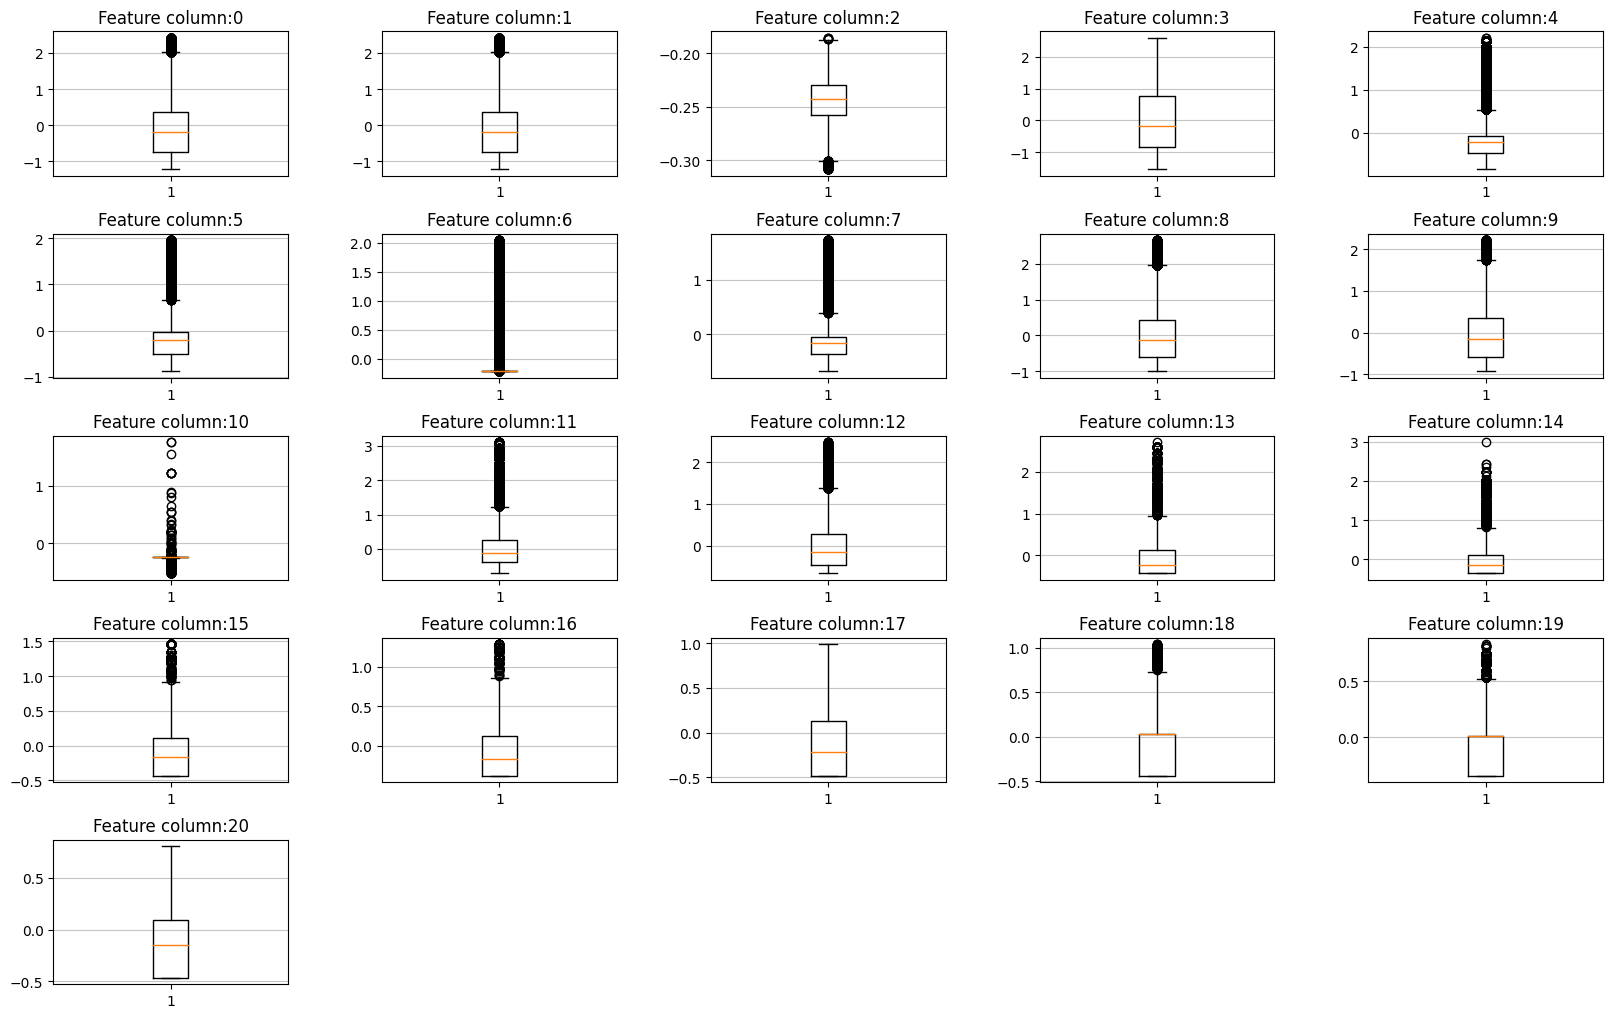

In [40]:
box_multi_plot(result)

# Logistic regression *without* regularization

Logisitc regression different than the one in implementations.py. uses stochastic gradient descent. Slight modifications to sigmoid and loss to not make an overflow.

In [7]:
def sigmoid(t):
    t = np.clip(t, -709, 709)  # Clip to avoid overflow. exp(709) is close to the maximum representable float64
    return np.where(t < 0, np.exp(t)/(1.0 +np.exp(t)) , 1.0 / (1.0 + np.exp(-t)))
def logistic_loss(y, tx, w):
    epsilon = 0.000000001
    y_hat = sigmoid(tx.dot(w))
    y_hat = np.clip(y_hat, epsilon, 1-epsilon)
    loss = - np.average(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
    return loss

def logistic_gradient(y, tx, w):
    return  tx.T.dot(sigmoid(tx.dot(w)) - y)/ len(y)

    
def logistic_regression_step(y, tx, initial_w, max_iters, gamma):
    w = initial_w
    prev_loss = float('inf')

    for n_iter in range(max_iters):
       for batch_y, batch_x in batch_iter(y, tx, 1, num_batches=len(tx)):
          gradient = logistic_gradient(batch_y, batch_x, w)
          w = w - gamma * gradient

       loss = logistic_loss(y, tx, w)
       if prev_loss <= loss:
          gamma *= 0.1        # control of the step size
       prev_loss = loss
       #print("SGD iter. {bi}/{ti}: loss={l}, w={}".format(   bi=n_iter, ti=max_iters - 1, l=loss, w=w))
        
    return w, loss

In [9]:
initial_w = np.zeros(x_train_std.shape[1], dtype=np.float64) # float64 can be faster and more stable to overflow issues appearantly
max_iters = 100
gamma = 0.1

In [10]:

w, loss = logistic_regression_step(y_train, x_train_std, initial_w, max_iters, gamma)


In [11]:
print("loss is ", loss)
print("w is ", w)

loss is  0.22924340476877145
w is  [-3.27714283e+00  5.97358740e-03  1.56328367e-02  1.09390716e-02
 -1.01284227e-02  2.24112448e-02 -2.30569832e-02  0.00000000e+00
  0.00000000e+00 -5.13949071e-01  4.10297682e-02  0.00000000e+00
 -1.70812189e-01  0.00000000e+00 -2.41542597e-02  6.15125785e-03
  1.14175303e-02  5.94134381e-01 -7.39418409e-02 -4.76007255e-03
 -2.10028480e-02 -2.76006599e-03  3.63636231e-02 -3.96158969e-02
  1.01179566e-02 -2.01473154e-01 -8.30796054e-02 -2.80547196e-01
 -2.52487516e-01 -2.50054271e-01 -1.34269832e-01 -1.64759702e-02
 -2.36521036e-02  1.09567745e-02 -5.90979124e-02 -3.19943082e-02
 -2.01536670e-02 -5.30932673e-02 -9.71013368e-02 -5.02039207e-02
 -1.42322480e-02  3.40141487e-02 -1.84255016e-02  2.26267116e-03
 -1.14936679e-01  1.35321426e-01 -5.64887148e-03 -2.71442679e-02
  3.23787539e-02 -4.54569961e-02 -1.57900825e-02 -3.70927422e-02
 -3.69578301e-02 -2.20893986e-02 -4.73067695e-03 -3.25744003e-02
  1.81063129e-02  3.91958186e-03 -1.08893002e-01 -1.378

### Trying to predict x_test

In [12]:
def prediction_labels(weights, data): 
    """Generates class predictions given weights, and a test data matrix."""
    y_pred = sigmoid(np.dot(data, weights))
    # display(y_pred)
    y_pred[np.where(y_pred >= 0.5)] = 1
    y_pred[np.where(y_pred < 0.5)] = 0
    return y_pred



In [13]:
y_pred = prediction_labels(w, x_train_std)
temp = y_pred[y_pred != -1]
print("temp", temp.shape)

temp (328135,)


In [14]:
y_train_01 =  np.where(y_train== -1,0,  1) # doesn't change anything ofc

In [17]:
accuracy = (y_pred == y_train).sum() / len(y_train)
print("accuracy", accuracy)

accuracy 0.9133314032334253


In [22]:
print("x_train_std", x_train_std.shape, "w shape", w.shape)

x_train_std (328135, 146) w shape (146,)


In [31]:
# predict on x_test
y_pred_test = prediction_labels(w, x_test_std)
y_pred_test

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
y_pred_test=  np.where(y_pred_test== 0, -1, 1)


109379


In [32]:
def accuracy(y_pred, y_train):
    return (y_pred == y_train).sum() / len(y_train)
def precision(y_pred, y_train):
    TP = np.sum((y_train==1) & (y_pred==1))
    FP = np.sum((y_train==0) & (y_pred==1))
    return TP/(TP+FP)
def recall(y_pred, y_train):
    recall = np.sum((y_train==1) & (y_pred==1)) / np.sum(y_train==1)
    return recall
def f_score (y_pred, y_train):
    return 2*precision(y_pred, y_train)*recall(y_pred, y_train) / (precision(y_pred, y_train) + recall(y_pred, y_train))

print("accuracy", accuracy(y_pred, y_train))
print("precision", precision(y_pred, y_train))
print("recall", recall(y_pred, y_train))
print("f_score", f_score(y_pred, y_train))


NameError: name 'compute_confusion_matrix_elements' is not defined

## Logistic regression with regularization

In [20]:
def logistic_gradient(y, tx, w):
    return  tx.T.dot(sigmoid(tx.dot(w)) - y)/ len(y)
def compute_gradient_logistic_loss_regularized(y, tx, w, lambda_):
    """Compute the gradient of the regularized logistic regression """
    grad = logistic_gradient(y, tx, w) + lambda_ * w
    return grad

def regularized_log_reg_sgd(y, tx, initial_w, max_iters, gamma,  lambda_ ):
    """Regularized logistic regression using stochastic gradient descent."""
    w = initial_w
    prev_loss = float('inf')
    
    for n_iter in range(max_iters):
		# Each iteration corresponds to one epoch (num_batches=len(y)) and each batch has size 1
        for batch_y, batch_x in batch_iter(y, tx, 1, num_batches=len(y)):
			# Computing the gradient of the logistic loss with respect to w
            gradient = compute_gradient_logistic_loss_regularized(batch_y, batch_x, w, lambda_)
			# Updating w
            w -= gamma * gradient
        
		
        loss = logistic_loss(y, tx, w) + (lambda_ / 2) * np.squeeze(w.T @ w)
        if prev_loss <= loss:
            gamma *= 0.1  # adapt step size
        prev_loss = loss

    return w, loss
    



In [21]:
# model paramaters (not optimized yet)
initial_w = np.zeros(x_train_std.shape[1], dtype=np.float64)
max_iters = 100
gamma = 0.01
lambda_ = 0.0001

w, loss = regularized_log_reg_sgd(y_train, x_train_std, initial_w, max_iters, gamma, lambda_)

In [22]:
y_pred_reg = prediction_labels(w, x_train_std)


In [38]:
y_pred_test = prediction_labels(w, x_test)
y_pred_test.shape

ValueError: shapes (109379,201) and (202,) not aligned: 201 (dim 1) != 202 (dim 0)

In [24]:
accuracy = (y_pred_reg == y_train).sum() / len(y_train)
print("accuracy", accuracy)

accuracy 0.9134228290185442


In [33]:
# convert 0,1 labels to 1 and -1
y_submit =  np.where(y_pred_test== 0, -1, 1)
print(len(y_submit))
y_submit.sum()
create_csv_submission(test_ids, y_submit, "submition0")


109379


-105523

In [39]:
create_csv_submission(test_ids, y_submit, "submition0")


In [92]:

def cross_validation(y, x, k_indices, k, method, **args):
    """
    Completes k-fold cross-validation using the regression method
    """
    # Get k'th subgroup in test, others in train
    tr_indices_set = np.delete(k_indices, k, 0).flatten()
    x_tr = x[tr_indices_set]
    y_tr = y[tr_indices_set] 
    
    te_indices = k_indices[k]
    x_te = x[te_indices]
    y_te = y[te_indices]

    # Apply the regression method
    w, loss = method(y=y_train, tx=x_train_std, **args)

    # Predict outputs with the w 
    y_pred = prediction_labels(w, x_te)

    # Calculate accuracy
    #accurancy = compute_accuracy(y_te, predictions)

    #return accuracy

In [ ]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold.

    Args:
        y:      shape=(N,)
        k_fold: K in K-fold, i.e. the fold num
        seed:   the random seed

    Returns:
        A 2D array of shape=(k_fold, N/k_fold) that indicates the data indices for each fold
    """
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval : (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)

# feel free to remove the f1 score thing and change parameters
def get_best_parameters(y, tx, intitial_w, max_iters, gamma, lambdas, k_fold):
    """
    
    Args:
        y: 
        tx: 
        intitial_w: 
        max_iters: 
        gamma: 
        lambdas: 
        k_fold: 

    Returns: best lambda parameter 

    """
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    
    
    rmse_tr = []
    f1_scores = []
    
    for lambda_ in lambdas:
        rmsetr_tmp = []
        f1_tmp = []
        for k in range(k_fold):
            # make cross validation return weight
            w, loss = cross_validation(y,tx, initial_w, max_iters, gamma)
            rmsetr_tmp.append(loss)
            y_pred = prediction_labels(w, tx)
            f1_tmp.append(f1_score(y_pred, y))
            
        rmse_tr.append(np.mean(rmsetr_tmp))
        f1_scores.append(np.mean(f1_tmp))
    best_lambda, best_rmse, best_f1  = lambdas[np.argmin(rmse_tr)], np.min(rmse_tr), np.min(f1_scores)
    print( "The best rmse of %.3f is obtained for a lambda of %.5f."%(best_rmse, best_lambda))       
    print("The best f1-score of %.3f is obtained for a lambda of %.5f."%(best_f1, best_lambda))
    return best_lambda     
        
        
        